<a href="https://colab.research.google.com/github/utkarshsharma1/ECG_Signals/blob/master/deep_hackerearth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.csv to test.csv
Saving train.csv to train.csv
Saving train_dir.zip to train_dir.zip
User uploaded file "test.csv" with length 45138 bytes
User uploaded file "train.csv" with length 135065 bytes
User uploaded file "train_dir.zip" with length 18964571 bytes


In [0]:
zip_ref = zipfile.ZipFile('/content/train_dir.zip', 'r')
zip_ref.extractall('/tmp')

In [0]:
df1 = pd.read_csv('train.csv', delimiter=',')
df1.dataframeName = 'Train.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1.head()

There are 5983 rows and 2 columns


,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-3
    tf.keras.layers.Dense(4, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/train_dir',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size = 400,
        subset='training',
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical',
        shuffle=True)

valid_generator = train_datagen.flow_from_directory(
        '/tmp/train_dir',
        target_size = (300, 300),
        subset='validation',
        batch_size = 100)

train_generator.class_indices

Found 4789 images belonging to 4 classes.
Found 1194 images belonging to 4 classes.


{'Attire': 0, 'Decorationandsignage': 1, 'Food': 2, 'misc': 3}

In [0]:
def get_callbacks(name):
  return [
    #tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5),
    tf.keras.callbacks.TensorBoard('logs/'+name),
  ]

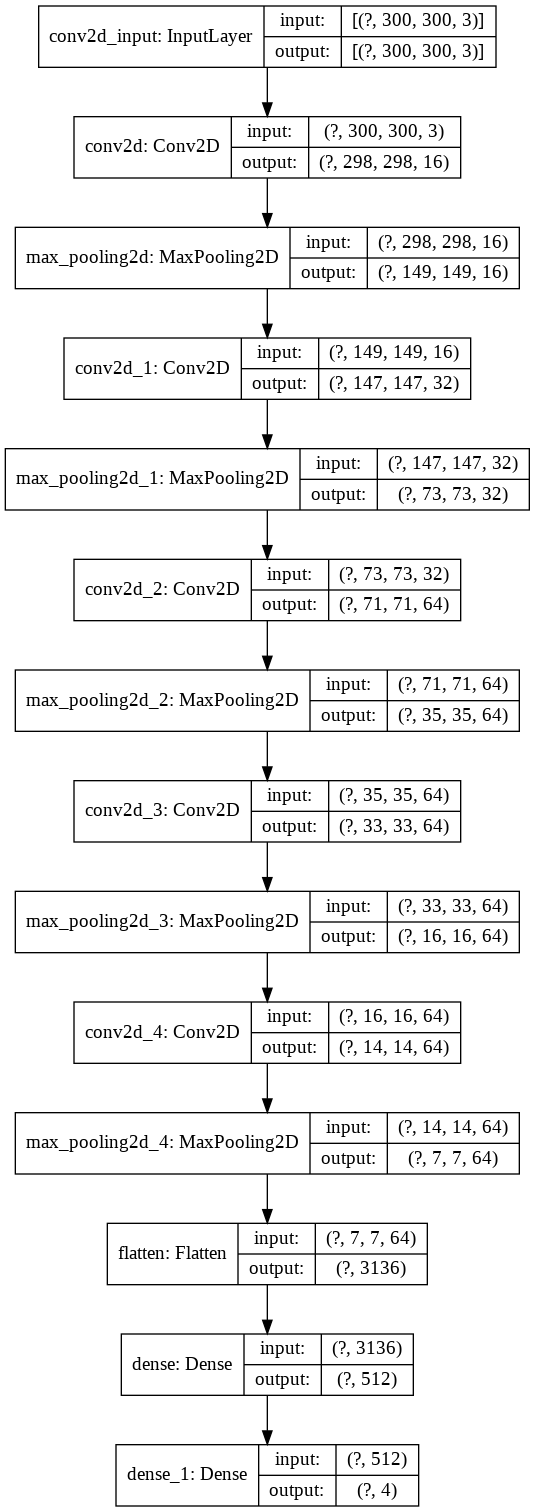

In [0]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [0]:
history = model.fit(
      train_generator,
      steps_per_epoch = 10,  
      epochs = 50,
      validation_data = valid_generator,
      validation_steps=8,
      verbose = 1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 8 steps
Epoch 1/50
10/10 [==============================] - 8s 753ms/step - loss: 0.8384 - acc: 0.6342 - val_loss: 1.2267 - val_acc: 0.5437
Epoch 2/50
10/10 [==============================] - 8s 780ms/step - loss: 0.7936 - acc: 0.6656 - val_loss: 1.1692 - val_acc: 0.5337
Epoch 3/50
10/10 [==============================] - 8s 771ms/step - loss: 0.7595 - acc: 0.6780 - val_loss: 1.2299 - val_acc: 0.5562
Epoch 4/50
10/10 [==============================] - 8s 777ms/step - loss: 0.7159 - acc: 0.6884 - val_loss: 1.2911 - val_acc: 0.5312
Epoch 5/50
10/10 [==============================] - 8s 774ms/step - loss: 0.6812 - acc: 0.7130 - val_loss: 1.4384 - val_acc: 0.4775
Epoch 6/50
10/10 [==============================] - 8s 773ms/step - loss: 0.6267 - acc: 0.7250 - val_loss: 1.5031 - val_acc: 0.5038
Epoch 7/50
10/10 [==============================] - 8s 781ms/step - loss: 0.6198 - acc: 0.7413 - val_loss: 1.3456 - v

In [0]:
model.save('v2.hdf5')

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

Saving image10.jpg to image10.jpg
[0. 0. 0. 0.]
